In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy.linalg import inv
from pandas import read_csv
import numpy as np

In [2]:
"""
Реализовать на Python модель одномерной линейной регрессии.
Оценки параметров модели вычислять с помощью метода наименьших квадратов.

Зависимость описывать с помощью многочлена,
предусмотреть возможность подбора степени многочлена.

Программа должна стоить график, на котором будут видны наблюдения (точки) и построенная
в результате решения задачи линия.
"""

class CustomRegression:

    def __init__(self, degree_polynomial):
        self.degree = degree_polynomial

    def fit(self, x, y):
        H = []
        for x_i in x:
            line = [x_i ** i for i in range(self.degree)]
            H.append(np.array(line))
        H = np.array(H, dtype='float')

        y_vector = np.array(np.array(y).reshape((-1, 1)))
        
        # (H.T * H)^-1 * H.T * y_vector
        self._coefficients = np.dot(np.dot(inv(np.dot(H.T, H)), H.T), y_vector)

    def predict(self, x):
        y = []
        for x_i in x:
            y_i = 0
            for i in range(self.degree):
                y_i += self._coefficients[i, 0] * (x_i ** i)
            y.append(y_i)
        return y


def loss_function(y_real, regr_result):
    return np.mean((y_real - regr_result)**2)

avg_error:  18.676469403863376


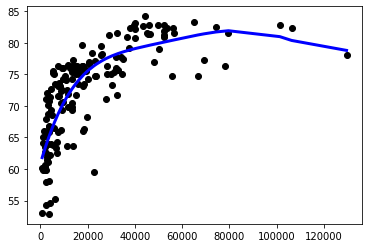

In [22]:
"""
DataSet содержит ключи:
country страна
gdp ВВП
kill убийств на 100000 населения
live продолжительность жизни
internet процент пользователей интернета
learn процент грамотных в стране
suicide количество самоубийств на 100000 населения
"""

data = read_csv('data/result.csv').sort_values(by=['gdp', 'live'])
x = data['gdp']
y = data['live']

model = CustomRegression(degree_polynomial=6)
model.fit(x, y)
regr = model.predict(x)

avg_error = loss_function(y, regr)

plt.scatter(x, y, color='black')
plt.plot(x, regr, color='blue', linewidth=3)
print('avg_error: ', avg_error)

avg_error:  20.913338352676398


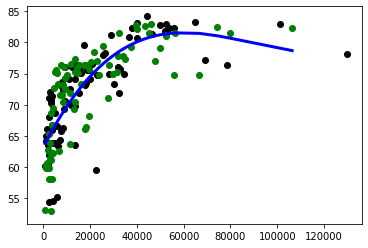

In [24]:
"""
Провести кросс-валидацию: разбив исходную выборку на обучающую и контрольную,
посмотреть работу модели на контрольной выборке
"""

data = read_csv('data/result.csv').sort_values(by=['gdp', 'live'])
x = data['gdp']
y = data['live']

# learning_x = x.head(int(len(x) * .5))
# learning_y = y.head(int(len(x) * .5))

# control_x = x.tail(int(len(x) * .5))
# control_y = y.tail(int(len(x) * .5))

learning_x = [item for ind, item in enumerate(x) if ind % 2 == 0]
learning_y = [item for ind, item in enumerate(y) if ind % 2 == 0]

control_x = np.array([item for ind, item in enumerate(x) if ind % 2 != 0])
control_y = np.array([item for ind, item in enumerate(y) if ind % 2 != 0])

model = CustomRegression(degree_polynomial=4)
model.fit(learning_x, learning_y)
regr = model.predict(control_x)

avg_error = loss_function(control_y, regr)

plt.scatter(learning_x, learning_y, color='black')
plt.scatter(control_x, control_y, color='green')
plt.plot(control_x, regr, color='blue', linewidth=3)

print('avg_error: ', avg_error)